In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==0)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(4527, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      25089
Female    23836
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       29629
Black        5819
Hispanic     5264
Other        4741
Asian        2736
Missing       736
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    36412
<36 weeks     12513
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          11841
2          19200
3           9712
4+          5594
Missing     2578
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

Some high school           15042
High school diploma/GED    13364
Unknown                    12054
Some college                7232
8th grade or less           1233
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Unknown                    14724
Bachelor's degree          11192
High school diploma/GED     7518
Some college                7290
Post graduate degree        6853
Some high school            1181
8th grade or less            167
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Ideal Participation      15477
Good Participation       12505
Average Participation    10828
Missing                   5806
Below Average             3377
Limited Participation      932
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,43804.000000,42062.000000,40601.000000,48649.000000
mean,11.532114,16.586462,17.147829,29.260817
std,16.524365,17.338081,17.523954,24.888271
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,4.000000,10.000000
50%,3.000000,10.000000,12.000000,25.000000
75%,18.000000,24.000000,24.000000,39.000000
max,160.000000,173.000000,200.000000,227.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION only         25370
OPTION + outside     8355
Missing              5764
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

1093

In [17]:
autism_subset.degree_hl_as.isnull().sum()

1173

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    21448
3.0     6974
4.0     6730
5.0     6119
2.0     3851
0.0     1499
1.0     1211
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

6.0    21367
3.0     7311
4.0     6347
5.0     5889
2.0     3712
0.0     1797
1.0     1329
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    38305
1.0     2526
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

8094

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0625-2018-0055', '0625-2018-0055', '0625-2018-0055', ...,
       '0102-2010-3021', '0102-2010-3021', '0102-2010-3021'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      37814
unilateral_snhl      2009
bilateral_cond       1838
bilateral_ansd       1612
assymetrical         1337
bilateral_mixed      1173
unilateral_cond      1086
unilateral_mixed      172
unilateral_ansd       159
bilateral_normal       52
unilateral_unk          0
bilateral_unk           0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.77
unilateral_snhl     0.04
bilateral_cond      0.04
assymetrical        0.03
bilateral_ansd      0.03
unilateral_cond     0.02
bilateral_mixed     0.02
unilateral_unk      0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        32238
bilateral_ha         9872
bimodal              2999
unilateral_ha        1387
unilateral_ci        1018
bilateral_other       166
unilateral_other       69
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.66
bilateral_ha        0.20
bimodal             0.06
unilateral_ha       0.03
unilateral_ci       0.02
unilateral_other    0.00
bilateral_other     0.00
dtype: float64

## Hearing Loss

In [29]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [30]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [31]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     18244
bilateral_hl_moderate      4710
bilateral_hl_modsev        3501
bilateral_hl_severe        2947
bilateral_hl_mild          2243
unilateral_hl_modsev        778
unilateral_hl_profound      771
unilateral_hl_severe        590
unilateral_hl_moderate      521
bilateral_hl_slight         468
unilateral_hl_mild          353
unilateral_hl_slight        161
bilateral_hl_normal          49
dtype: int64

In [32]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.37
bilateral_hl_moderate     0.10
bilateral_hl_modsev       0.07
bilateral_hl_severe       0.06
bilateral_hl_mild         0.05
unilateral_hl_profound    0.02
unilateral_hl_modsev      0.02
unilateral_hl_severe      0.01
unilateral_hl_moderate    0.01
unilateral_hl_mild        0.01
bilateral_hl_slight       0.01
unilateral_hl_slight      0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [33]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

1207

## Summary of scores by domain

In [34]:
test_scores = lsl_dr[inclusion_mask].copy()

In [35]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [36]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,5082.0,82.1,19.8,0.0,69.0,85.0,98.0,128.0
Expressive Language,9596.0,84.4,20.5,0.0,69.0,85.0,99.0,150.0
Expressive Vocabulary,7336.0,91.8,19.6,0.0,79.0,93.0,105.0,150.0
Language,9788.0,84.6,21.5,0.0,69.0,84.0,100.0,250.0
Receptive Language,9510.0,86.8,20.1,0.0,73.0,87.0,101.0,150.0
Receptive Vocabulary,7613.0,89.6,18.4,0.0,78.0,90.0,103.0,160.0


In [37]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Language',
       'Expressive Language', 'Language', 'Receptive Vocabulary',
       'Articulation'], dtype=object)

In [38]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

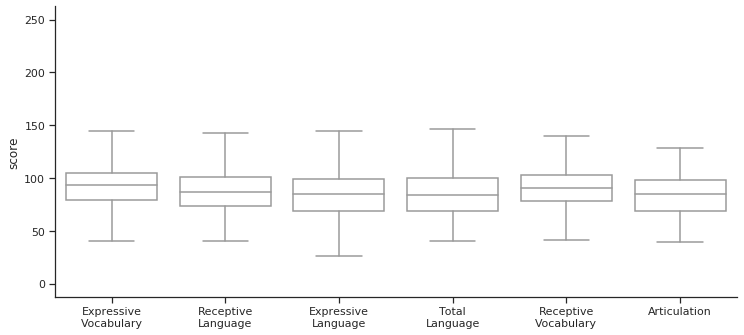

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
# sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [41]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                       
Articulation          False              2356.0  84.389643  19.000663  39.0   
                      True               2726.0  80.111519  20.204370   0.0   
Expressive Language   False              4831.0  88.554337  20.402470   0.0   
                      True               4765.0  80.250157  19.693047   9.0   
Expressive Vocabulary False              3426.0  94.194104  19.876700   0.0   
                      True               3910.0  89.688491  19.171618   0.0   
Language              False              4892.0  88.665576  21.538547   0.0   
                      True               4896.0  80.512051  20.661162  40.0   
Receptive Language    False              4806.0  90.375156  19.984055   0.0   
                      True               4704.0  83.204932  19.570415  11.0   
Receptive Vocabulary  False              3559.0  92.185164  18.338466  10.0   
                      True               4054.0  87.277750  18.181428   0.0   

                                           25%   50%    75%    max  
domain                age_amp_greater_6                             
Articulation          False              72.00  87.0   99.0  128.0  
                      True               66.25  82.0   97.0  122.0  
Expressive Language   False              74.00  89.0  103.0  150.0  
                      True               66.00  80.0   94.0  150.0  
Expressive Vocabulary False              81.00  96.0  108.0  146.0  
                      True               78.00  90.0  102.0  150.0  
Language              False              74.00  89.0  104.0  250.0  
                      True               65.00  80.0   95.0  186.0  
Receptive Language    False              76.00  91.0  105.0  150.0  
                      True               69.00  83.0   98.0  150.0  
Receptive Vocabulary  False              80.00  94.0  105.0  160.0  
                      True               75.00  88.0  100.0  159.0

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std  \
domain                age_enroll_greater_6                                 
Articulation          False                 2423.0  83.796946  19.263162   
                      True                  2659.0  80.543813  20.097464   
Expressive Language   False                 4711.0  87.690087  20.499731   
                      True                  4885.0  81.287615  19.960490   
Expressive Vocabulary False                 3472.0  93.384217  20.130684   
                      True                  3864.0  90.362578  19.062176   
Language              False                 4794.0  87.708385  21.768524   
                      True                  4994.0  81.590909  20.791764   
Receptive Language    False                 4698.0  89.594508  20.094828   
                      True                  4812.0  84.128013  19.740128   
Receptive Vocabulary  False                 3578.0  91.032700  18.480064   
                      True                  4035.0  88.276580  18.266301   

                                             min   25%   50%    75%    max  
domain                age_enroll_greater_6                                  
Articulation          False                  0.0  71.0  86.0   99.0  128.0  
                      True                   3.0  67.0  83.0   97.0  122.0  
Expressive Language   False                 26.0  73.0  88.0  102.0  150.0  
                      True                   0.0  67.0  81.0   95.0  150.0  
Expressive Vocabulary False                  0.0  80.0  94.0  107.0  146.0  
                      True                   0.0  78.0  91.0  103.0  150.0  
Language              False                 40.0  73.0  88.0  103.0  250.0  
                      True                   0.0  66.0  81.0   96.0  186.0  
Receptive Language    False                 27.0  75.0  90.0  104.0  150.0  
                      True                   0.0  70.0  84.0   98.0  150.0  
Receptive Vocabulary  False                  0.0  79.0  92.0  104.0  160.0  
                      True                   0.0  76.0  89.0  101.0  159.0

(Non-)Profound hearing loss

In [43]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min   25%  \
domain                profound_hl                                             
Articulation          False        2466.0  84.624088  19.331490   3.0  72.0   
                      True         2616.0  79.710627  19.884003   0.0  67.0   
Expressive Language   False        4898.0  89.855247  19.466629   9.0  76.0   
                      True         4698.0  78.775436  19.971377   0.0  63.0   
Expressive Vocabulary False        3565.0  95.510519  18.689762   0.0  84.0   
                      True         3771.0  88.277910  19.854863   0.0  76.0   
Language              False        5014.0  90.263263  20.537999  40.0  76.0   
                      True         4774.0  78.625681  20.852932   0.0  62.0   
Receptive Language    False        4831.0  91.602774  19.311304  11.0  78.0   
                      True         4679.0  81.899124  19.710194   0.0  67.0   
Receptive Vocabulary  False        3673.0  93.780833  17.254649   0.0  83.0   
                      True         3940.0  85.648223  18.601856   0.0  73.0   

                                    50%    75%    max  
domain                profound_hl                      
Articulation          False        87.0  100.0  126.0  
                      True         82.0   96.0  128.0  
Expressive Language   False        90.0  104.0  150.0  
                      True         78.0   92.0  146.0  
Expressive Vocabulary False        96.0  108.0  147.0  
                      True         89.0  101.0  150.0  
Language              False        90.0  104.0  250.0  
                      True         78.0   93.0  186.0  
Receptive Language    False        92.0  105.0  150.0  
                      True         81.0   96.0  150.0  
Receptive Vocabulary  False        95.0  106.0  159.0  
                      True         86.0   99.0  160.0

Parent with(out) hearing loss

In [44]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                       
Articulation          False           4814.0  82.035314  19.782266   0.0   
                      True             268.0  83.164179  19.535886  39.0   
Expressive Language   False           9113.0  84.267749  20.509818   0.0   
                      True             483.0  87.507246  19.629384  45.0   
Expressive Vocabulary False           6938.0  91.629288  19.636485   0.0   
                      True             398.0  94.640704  19.355069   0.0   
Language              False           9295.0  84.391931  21.434892   0.0   
                      True             493.0  88.267748  22.271726  40.0   
Receptive Language    False           9030.0  86.710078  20.139229   0.0   
                      True             480.0  89.056250  19.268539  47.0   
Receptive Vocabulary  False           7209.0  89.399917  18.449928   0.0   
                      True             404.0  92.641089  17.565966  40.0   

                                        25%   50%     75%    max  
domain                parent_with_hl                              
Articulation          False           69.00  84.0   98.00  128.0  
                      True            70.00  85.0  100.00  117.0  
Expressive Language   False           69.00  85.0   99.00  150.0  
                      True            73.00  87.0  102.00  144.0  
Expressive Vocabulary False           79.00  92.0  105.00  150.0  
                      True            83.00  97.0  108.00  138.0  
Language              False           69.00  84.0  100.00  250.0  
                      True            73.00  88.0  102.00  195.0  
Receptive Language    False           73.00  87.0  101.00  150.0  
                      True            76.00  89.0  101.25  139.0  
Receptive Vocabulary  False           77.00  90.0  103.00  160.0  
                      True            81.75  94.0  104.00  143.0

Mother with(out) college education

In [45]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count       mean        std   min  \
domain                mother_college                                       
Articulation          0.0             2997.0  82.008675  19.541983   0.0   
                      1.0              715.0  84.447552  19.102656  39.0   
Expressive Language   0.0             5892.0  83.381025  19.868023   0.0   
                      1.0             1424.0  91.873596  21.830453  40.0   
Expressive Vocabulary 0.0             4375.0  91.154743  19.205958   0.0   
                      1.0             1089.0  99.561065  19.793701  25.0   
Language              0.0             6013.0  83.554299  20.982201   0.0   
                      1.0             1451.0  92.588560  22.482566  40.0   
Receptive Language    0.0             5845.0  85.932250  19.539589   0.0   
                      1.0             1410.0  94.165957  21.131028  40.0   
Receptive Vocabulary  0.0             4517.0  89.102280  18.025513  10.0   
                      1.0             1143.0  95.899388  19.352781   0.0   

                                       25%    50%    75%    max  
domain                mother_college                             
Articulation          0.0             69.0   84.0   98.0  122.0  
                      1.0             73.0   87.0  100.0  128.0  
Expressive Language   0.0             69.0   83.0   98.0  150.0  
                      1.0             77.0   92.0  107.0  150.0  
Expressive Vocabulary 0.0             79.0   92.0  104.0  146.0  
                      1.0             87.0  100.0  113.0  150.0  
Language              0.0             68.0   83.0   98.0  250.0  
                      1.0             77.0   94.0  108.0  163.0  
Receptive Language    0.0             72.0   86.0  100.0  147.0  
                      1.0             79.0   96.0  110.0  150.0  
Receptive Vocabulary  0.0             77.0   89.0  102.0  144.0  
                      1.0             84.0   98.0  109.5  159.0